<h1>Decision Tree model on PhishingVsBenignURL data set</h1>

In [2]:
#Importing Libraries
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os
import pandas as pd 
import numpy as np 
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
#Path to the graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz

In [2]:
#Loading the csv to the dataframe
data = pd.read_csv(r"C:\Users\palak\Downloads\DataSetForPhishingVSBenignUrl.csv")

In [3]:
#Displaying the dataframe
data.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


<h2>Encoding the values of Phishing vs Non phishing to use as target variables</h2>

In [4]:
#Target Variables Phising vs Non Phising for encoding the values
encoding_conditions = [(data['URL_Type_obf_Type'] == 'phishing'), (data['URL_Type_obf_Type'] != 'phishing')]
# Assigning the conditions with the encoding values.
encoding_values = [0,1]
#encoding_conditions and encoding_values as parameters to np.select and creating new column.
data['obf_Type'] = np.select(encoding_conditions, encoding_values)
#displaying
data.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type,obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement,1
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement,1
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement,1
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement,1
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement,1


In [5]:
data=data.drop(columns='URL_Type_obf_Type')

<h2>Replacing the values of NaN and Infinity with 0</h2>

In [6]:
data=data.replace(np.nan, 0.0)

In [7]:
data=data.replace(np.inf, 0.0)

In [8]:
data

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,obf_Type
0,0,4,5,5.500000,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,0.000000,-1.000000,1
1,0,4,5,5.500000,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.000000,1
2,0,4,5,5.500000,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.000000,1
3,0,4,12,5.500000,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.000000,1
4,0,4,6,5.500000,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,1
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,1
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,1
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,1


In [9]:
#X has all the features and y has target variables
y = data[['obf_Type']] 
X = data.drop(['obf_Type', ], axis = 1)
print(y.shape, X.shape)
X

(36707, 1) (36707, 79)


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
0,0,4,5,5.500000,14,4.400000,4,8,3,0,...,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,0.000000,-1.000000
1,0,4,5,5.500000,14,6.000000,4,12,4,0,...,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.000000
2,0,4,5,5.500000,14,5.800000,4,12,5,0,...,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.000000
3,0,4,12,5.500000,14,5.500000,4,32,16,0,...,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.000000
4,0,4,6,5.500000,14,7.333334,4,18,11,0,...,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,11,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,2,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,14,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,1,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772


In [10]:
#Scaling
scaled = MinMaxScaler() 
X = scaled.fit_transform(X) 

In [11]:
#Splitting the data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = np.random)
y_test=y_test.astype('int')
y_train=y_train.astype('int')
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(29365, 79) (29365, 1)
(7342, 79) (7342, 1)


<h1>Gini Impurity</h1>

In [12]:
#Decision Tree Classifier with max_depth = 1 
gi1 = DecisionTreeClassifier(criterion = "gini",random_state = 50, max_depth=1, min_samples_leaf=5)
gi1.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gi1.predict(X_test), y_test))

Accuracy: 0.7852083900844457


In [13]:
#Decision Tree Classifier with max_depth = 2
gi2 = DecisionTreeClassifier(criterion = "gini",random_state = 50, max_depth=2, min_samples_leaf=5)
gi2.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gi2.predict(X_test), y_test))

Accuracy: 0.8435031326614002


In [14]:
#Decision Tree Classifier with max_depth = 3 
gi3 = DecisionTreeClassifier(criterion = "gini",random_state = 50, max_depth=3, min_samples_leaf=5)
gi3.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gi3.predict(X_test), y_test))

Accuracy: 0.8770089893761918


In [15]:
#Decision Tree Classifier with max_depth = 4
gi4 = DecisionTreeClassifier(criterion = "gini",random_state = 50, max_depth=4, min_samples_leaf=5)
gi4.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gi4.predict(X_test), y_test))

Accuracy: 0.8748297466630346


In [16]:
#Decision Tree Classifier with max_depth = 5
gi5 = DecisionTreeClassifier(criterion = "gini",random_state = 50,max_depth=5, min_samples_leaf=5)
gi5.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gi5.predict(X_test), y_test))

Accuracy: 0.8970307818033233


In [17]:
#Decision Tree Classifier with max_depth = 6
gi6 = DecisionTreeClassifier(criterion = "gini",random_state = 50,max_depth=6, min_samples_leaf=5)
gi6.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gi6.predict(X_test), y_test))

Accuracy: 0.912013075456279


<h1> Entropy Impurity</h1>

In [18]:
#Decision Tree Classifier with max_depth = 1
ei1 = DecisionTreeClassifier(criterion = "entropy", max_depth=1, min_samples_leaf=5)
ei1.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ei1.predict(X_test), y_test))

Accuracy: 0.7852083900844457


In [19]:
#Decision Tree Classifier with max_depth = 2
ei2 = DecisionTreeClassifier(criterion = "entropy", max_depth=2, min_samples_leaf=5)
ei2.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ei2.predict(X_test), y_test))

Accuracy: 0.8435031326614002


In [20]:
#Decision Tree Classifier with max_depth = 3
ei3 = DecisionTreeClassifier(criterion = "entropy", max_depth=3, min_samples_leaf=5)
ei3.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ei3.predict(X_test), y_test))

Accuracy: 0.8740125306456007


In [21]:
#Decision Tree Classifier with max_depth = 4
ei4 = DecisionTreeClassifier(criterion = "entropy", max_depth=4, min_samples_leaf=5)
ei4.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ei4.predict(X_test), y_test))

Accuracy: 0.874148733315173


In [22]:
#Decision Tree Classifier with max_depth = 5
ei5 = DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_leaf=5)
ei5.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ei5.predict(X_test), y_test))

Accuracy: 0.8956687551076001


In [23]:
#Decision Tree Classifier with max_depth = 6
ei6 = DecisionTreeClassifier(criterion = "entropy", max_depth=6, min_samples_leaf=5)
ei6.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ei6.predict(X_test), y_test))

Accuracy: 0.9064287660038137


<h1> Results from above: </h1>

In [4]:
results = {'Depth': [1,2,3,4,5,6],
        'Accuracy_Gini': [0.785,0.843,0.874,0.891, 0.897,0.912],
        'Accuracy_Entropy': [0.785,0.843,0.874,0.874,0.895,0.906]
          }
df = pd.DataFrame(results, columns = ['Depth', 'Accuracy_Gini', 'Accuracy_Entropy'])
print(df)
print("Observations")
print("Upto 3 levels the value of accuracy for gini impurity and entropy is the same.")
print("After level 3, accuracy of gini is more than entropy")
print("With the increase in the tree depth it is more prone to overfitting.")

   Depth  Accuracy_Gini  Accuracy_Entropy
0      1          0.785             0.785
1      2          0.843             0.843
2      3          0.874             0.874
3      4          0.891             0.874
4      5          0.897             0.895
5      6          0.912             0.906
Observations
Upto 3 levels the value of accuracy for gini impurity and entropy is the same.
After level 3, accuracy of gini is more than entropy
With the increase in the tree depth it is more prone to overfitting.


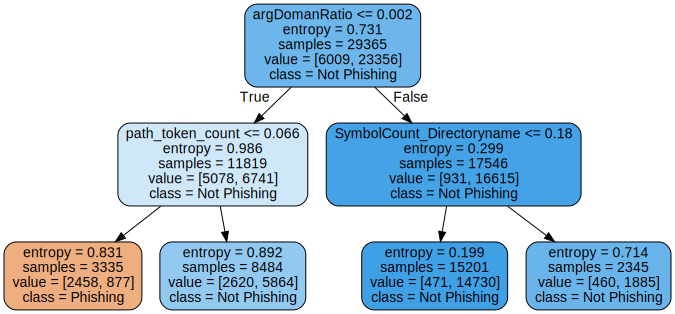

In [25]:
# Visualizing the Gini Index based Decision Tree
feature_names = data.columns[:79]
class_names = ["Phishing", "Not Phishing"]
graph_data = tree.export_graphviz(ei2, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

In [7]:
print("Understanding and Discussions:")
print("Impurity of the target is calculated for the trees. We split the dataset using different attributes and impurity for each branch will be calculated and added proportionally and we get the total impurity that will be used for the split. We get the Information gain by subtracting the impurity. We decide on the decision node by taking the largest node and divide it by its branches. We get the tree that is built top-down. Advantages are that it takes less time and gives a detailed analysis.")

Understanding and Discussions:
Impurity of the target is calculated for the trees. We split the dataset using different attributes and impurity for each branch will be calculated and added proportionally and we get the total impurity that will be used for the split. We get the Information gain by subtracting the impurity. We decide on the decision node by taking the largest node and divide it by its branches. We get the tree that is built top-down. Advantages are that it takes less time and gives a detailed analysis.
